# Customer Churn Analysis

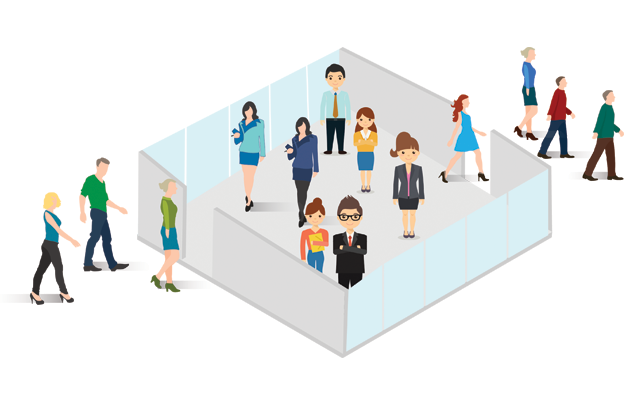

# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2132,6082-OQFBA,Male,0,Yes,Yes,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,436.9,No
734,1173-NOEYG,Female,0,Yes,No,27,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),90.15,2423.4,No
5772,8645-KOMJQ,Male,0,Yes,Yes,69,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),81.95,5601.4,No


In [7]:
df.shape

(7043, 21)

<b>The dataset consists of 7043 rows and 21 columns.</b>

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<b>The dataset consists of 21 columns. Here, the column 'Churn' is the target variable and the remaining columns are the features.</b>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<b>As we can see, majority of the columns are of object datatype. So, we need to carry out encoding techniques.</b>

<b>By analyzing the dataset, we can observe that the column 'TotalCharges' is of type float, but when we check the datatypes of the columns, it is showing that it is of type object.</b>

<b>So, let's change the datatype of column 'TotalCharges' from object to float.</b>

In [11]:
df['TotalCharges'] = df['TotalCharges'].str.strip()

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<b>We can see that the column 'TotalCharges' has been converted to float datatype. We can also see that, it does not contain any null values.</b>

In [13]:
# Let's check the number of unique values present in the dataset

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [14]:
# Let's drop the column 'Loan_ID' as it contains only unique values, and serves no purpose in our analysis

df.drop('customerID', axis=1, inplace=True)

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<b>Now, we are left with 7043 rows and 20 columns.</b>

In [16]:
# Let's check the value counts of each column

for i in df.columns:
    print('\n','__________________________________')
    print(df[i].value_counts())


 __________________________________
Male      3555
Female    3488
Name: gender, dtype: int64

 __________________________________
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

 __________________________________
No     3641
Yes    3402
Name: Partner, dtype: int64

 __________________________________
No     4933
Yes    2110
Name: Dependents, dtype: int64

 __________________________________
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

 __________________________________
Yes    6361
No      682
Name: PhoneService, dtype: int64

 __________________________________
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

 __________________________________
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

 __________________________________
No                     3498
Yes       

<b>We can see that duplicate entries are present tn the columns 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' and 'StreamingMovies'. So let's replace them.</b>

In [17]:
df["MultipleLines"].replace("No phone service","No",inplace=True)

df["OnlineSecurity"].replace("No internet service","No",inplace=True)

df["OnlineBackup"].replace("No internet service","No",inplace=True)

df["DeviceProtection"].replace("No internet service","No",inplace=True)

df["TechSupport"].replace("No internet service","No",inplace=True)

df["StreamingTV"].replace("No internet service","No",inplace=True)

df["StreamingMovies"].replace("No internet service","No",inplace=True)

In [18]:
# Let's check the value counts of each column again

for i in df.columns:
    print('\n','__________________________________')
    print(df[i].value_counts())


 __________________________________
Male      3555
Female    3488
Name: gender, dtype: int64

 __________________________________
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

 __________________________________
No     3641
Yes    3402
Name: Partner, dtype: int64

 __________________________________
No     4933
Yes    2110
Name: Dependents, dtype: int64

 __________________________________
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

 __________________________________
Yes    6361
No      682
Name: PhoneService, dtype: int64

 __________________________________
No     4072
Yes    2971
Name: MultipleLines, dtype: int64

 __________________________________
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

 __________________________________
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

 ____________________________

<b>By checking the value counts of the columns again, we can confirm that duplicate entries have been replaced.</b>

In [19]:
# Let's check the null values

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<b>As we can see, null values are present in the column 'TotalCharges'.</b>

<b>So, let's replace nan values of the column 'TotalCharges' with its mean.</b>

In [20]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [21]:
# Let's check the missing values again

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<b>As we can see, there are no null values in the dataset.</b>

<AxesSubplot:>

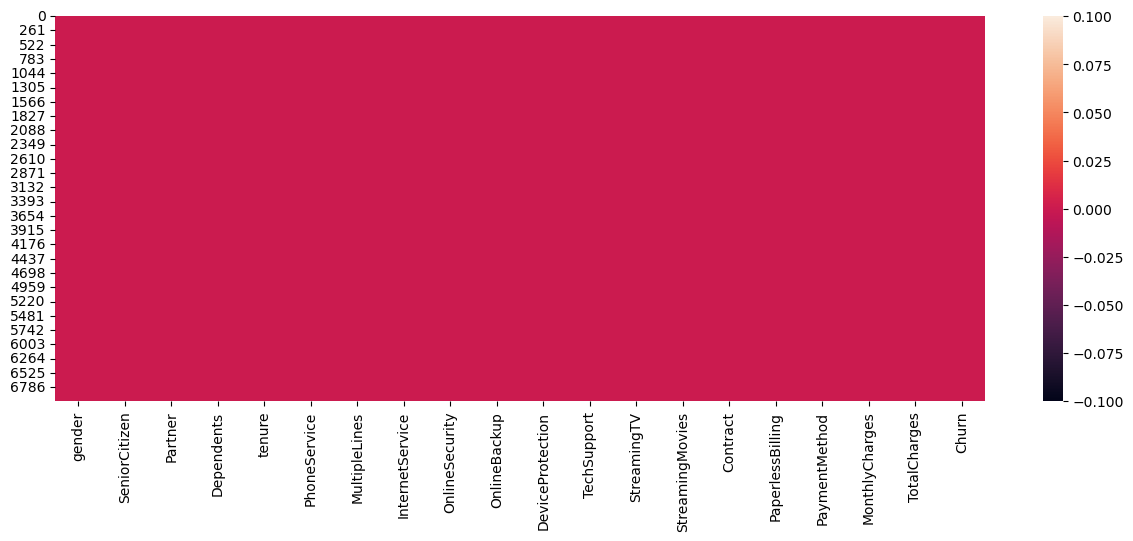

In [22]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull())

<b>We can confirm that there are no null values in the dataset by looking at the Heat Map.</b>

In [23]:
# Now, let's separate the categorical columns

categorical_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [24]:
# Now, let's separate the numerical columns

numerical_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


# Data Visualization

# Univariate Analysis

<b>Now, let's visualize the categorical columns</b>

Male      3555
Female    3488
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

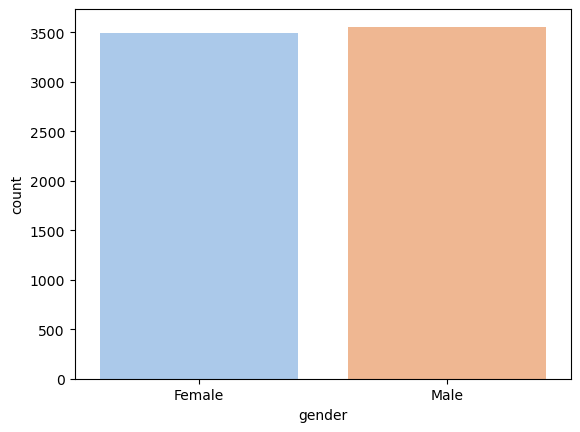

In [25]:
print(df['gender'].value_counts())
sns.countplot(df['gender'], palette='pastel')

<b>As we can see, male and female customers are almost equal.</b>

No     3641
Yes    3402
Name: Partner, dtype: int64


<AxesSubplot:xlabel='Partner', ylabel='count'>

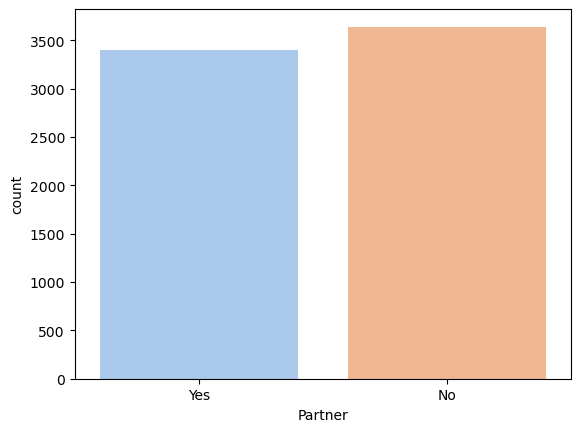

In [26]:
print(df['Partner'].value_counts())
sns.countplot(df['Partner'], palette='pastel')

<b>As we can see, a slight majority of the customers have no partner.</b>

No     4933
Yes    2110
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

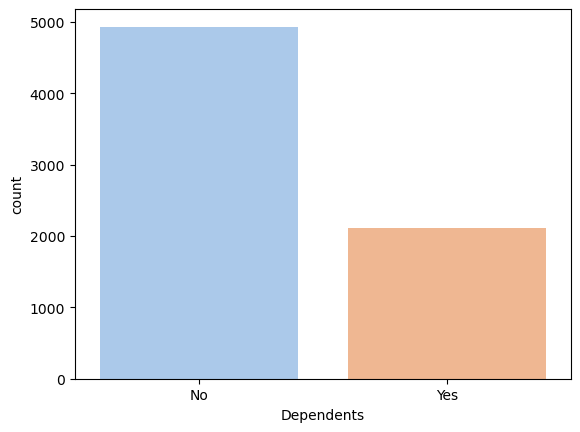

In [27]:
print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'], palette='pastel')

<b>As we can see, majority of the customers do not have dependents.</b>

Yes    6361
No      682
Name: PhoneService, dtype: int64


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

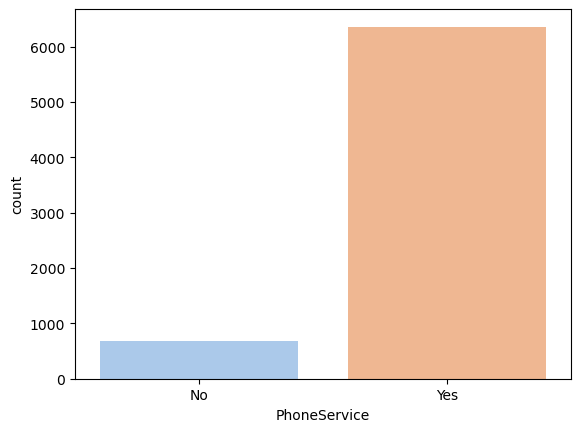

In [28]:
print(df['PhoneService'].value_counts())
sns.countplot(df['PhoneService'], palette='pastel')

<b>As we can see, majority of the customers use Phone Service.</b>

No     4072
Yes    2971
Name: MultipleLines, dtype: int64


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

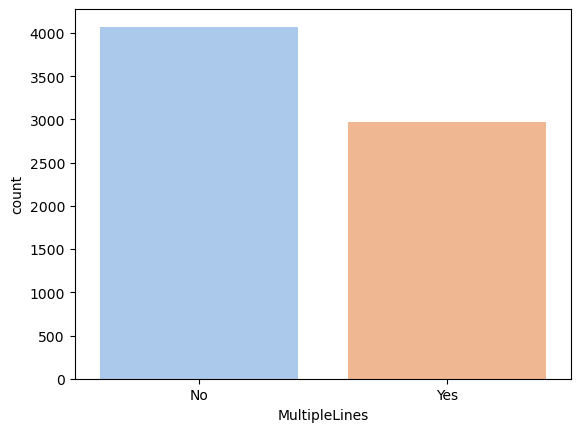

In [29]:
print(df['MultipleLines'].value_counts())
sns.countplot(df['MultipleLines'], palette='pastel')

<b>As we can see, majority of the customers do not have Multiple Lines.</b>

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


<AxesSubplot:xlabel='InternetService', ylabel='count'>

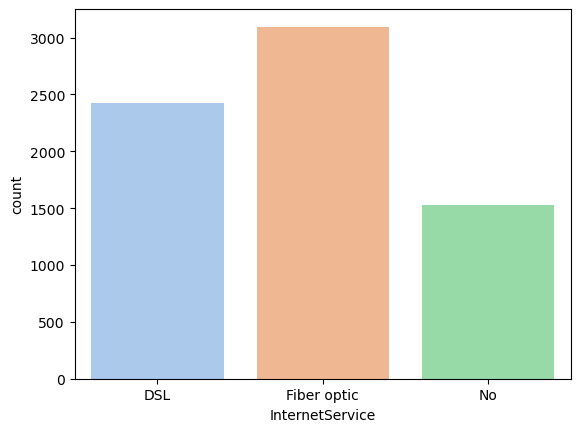

In [30]:
print(df['InternetService'].value_counts())
sns.countplot(df['InternetService'], palette='pastel')

<b>As we can see, majority of the customers use Fiber optic Internet Service, followed by DSL. There are also a large number of customers, who do not use Internet Service.</b>

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

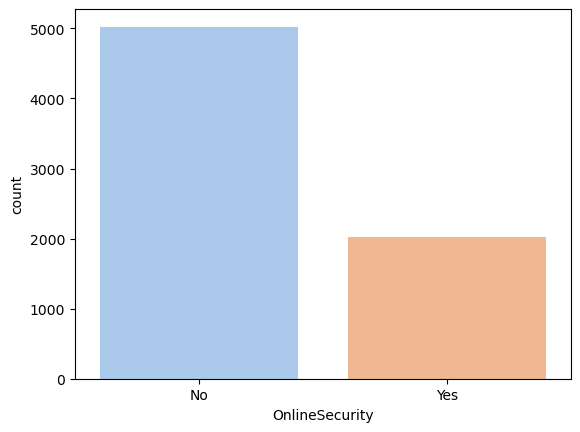

In [31]:
print(df['OnlineSecurity'].value_counts())
sns.countplot(df['OnlineSecurity'], palette='pastel')

<b>As we can see, majority of the customers do not use Online Security.</b>

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

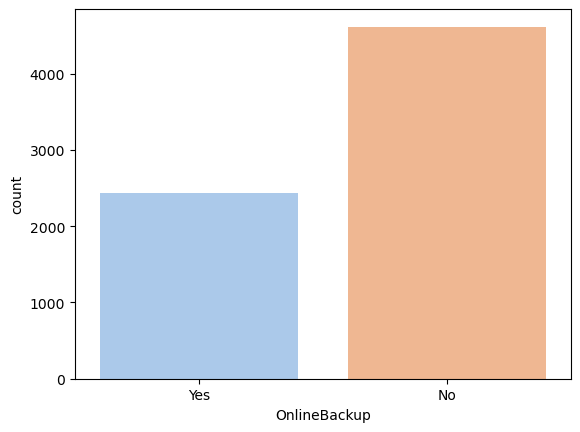

In [32]:
print(df['OnlineBackup'].value_counts())
sns.countplot(df['OnlineBackup'], palette='pastel')

<b>As we can see, majority of the customers do not use Online Backup.</b>

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

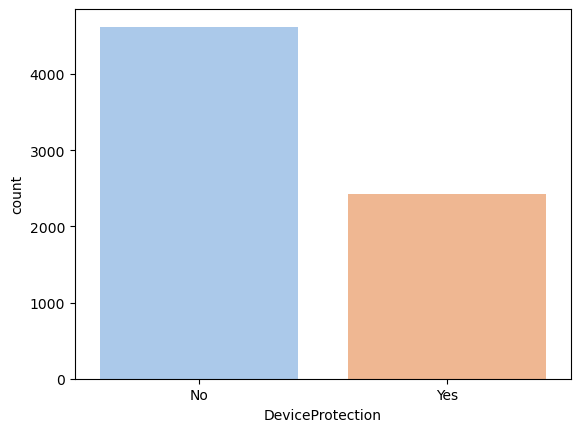

In [33]:
print(df['DeviceProtection'].value_counts())
sns.countplot(df['DeviceProtection'], palette='pastel')

<b>As we can see, majority of the customers do not use Device Protection.</b>

No     4999
Yes    2044
Name: TechSupport, dtype: int64


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

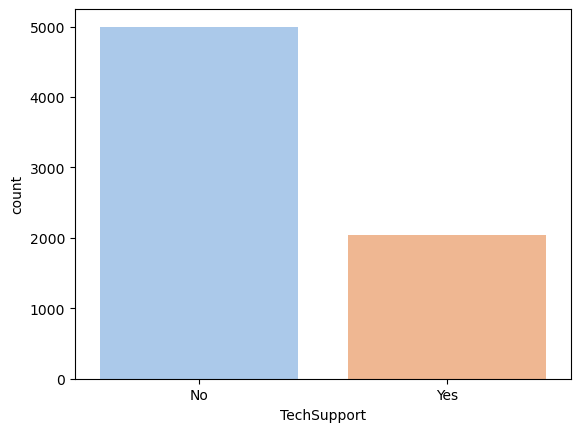

In [34]:
print(df['TechSupport'].value_counts())
sns.countplot(df['TechSupport'], palette='pastel')

<b>As we can see, majority of the customers do not use Tech Support.</b>

No     4336
Yes    2707
Name: StreamingTV, dtype: int64


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

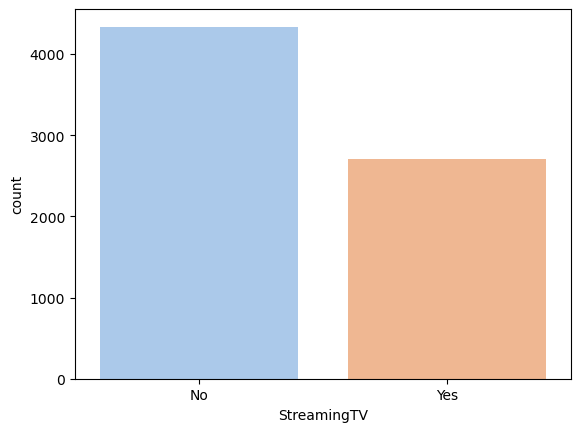

In [35]:
print(df['StreamingTV'].value_counts())
sns.countplot(df['StreamingTV'], palette='pastel')

<b>As we can see, majority of the customers do not have Streaming TV.</b>

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

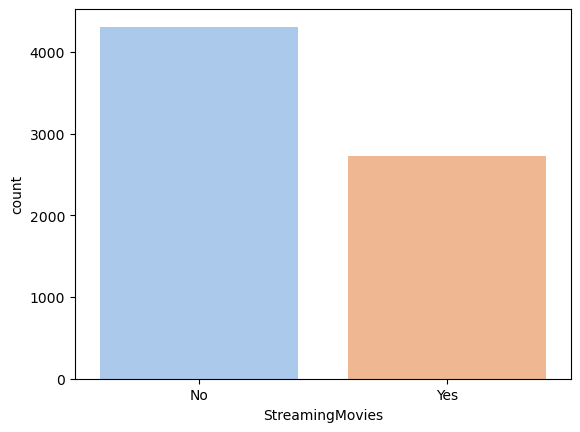

In [36]:
print(df['StreamingMovies'].value_counts())
sns.countplot(df['StreamingMovies'], palette='pastel')

<b>As we can see, majority of the customers do not have Streaming Movies.</b>

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

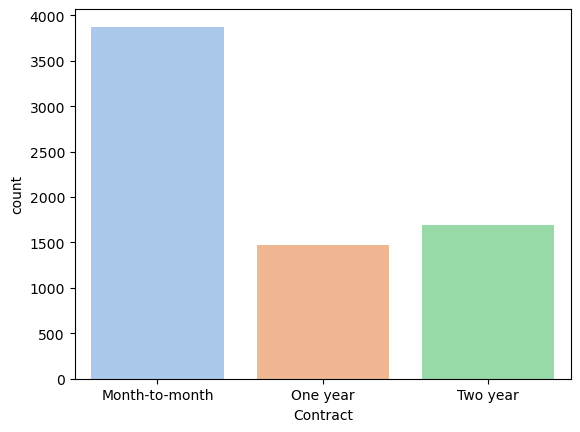

In [37]:
print(df['Contract'].value_counts())
sns.countplot(df['Contract'], palette='pastel')

<b>As we can see, majority of the customers opt for Month-to-month Contract, followed by Two year and One year Contract.</b>

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

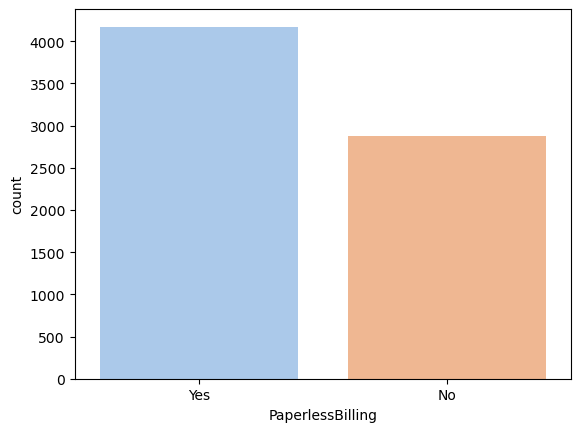

In [38]:
print(df['PaperlessBilling'].value_counts())
sns.countplot(df['PaperlessBilling'], palette='pastel')

<b>As we can see, majority of the customers opt for Paperless Billing.</b>

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

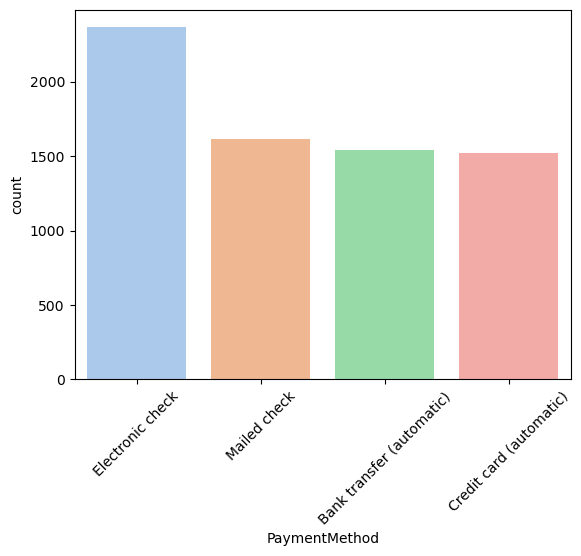

In [39]:
print(df['PaymentMethod'].value_counts())
plt.xticks(rotation = 45)
sns.countplot(df['PaymentMethod'], palette='pastel')

<b>As we can see, majority of the customers prefer Electronic check Payment Method.</b>

No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

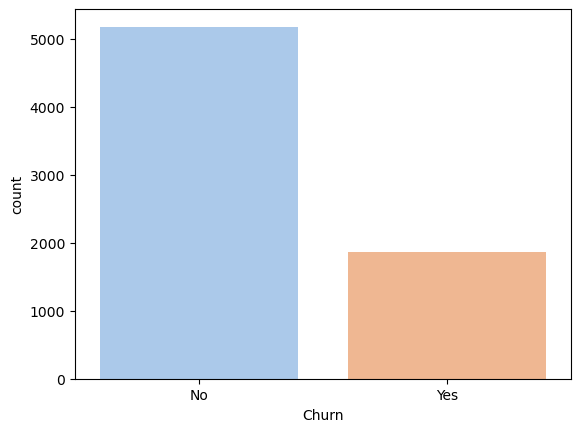

In [40]:
print(df['Churn'].value_counts())
sns.countplot(df['Churn'], palette='pastel')

<b>As we can see, majority of the customers do not churn.</b>

# Checking the distribution of data for numerical columns

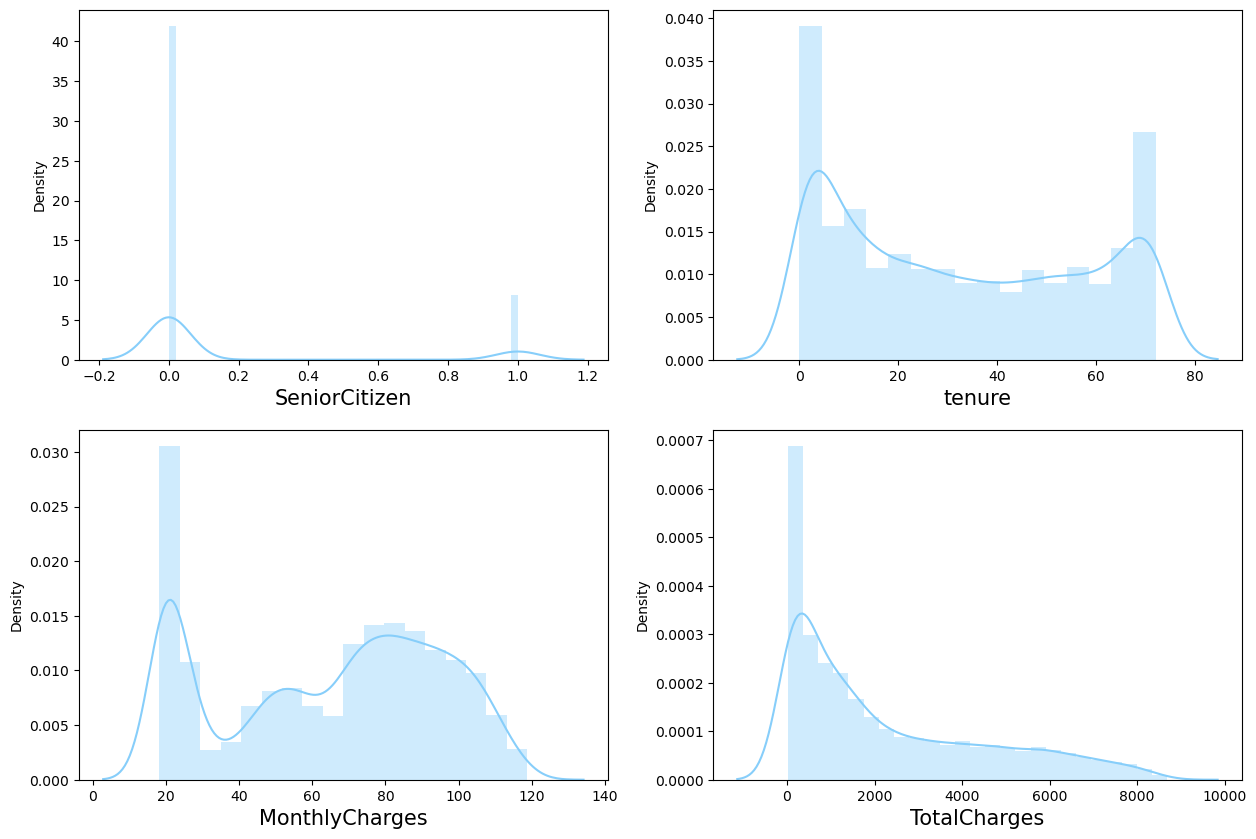

In [41]:
plt.figure(figsize=(15,10))
plotnumber = 1

for column in numerical_columns:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column], color='lightskyblue')
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()

<b>From the distribution plot above, we can observe the following things:</b>

* The column 'SeniorCitizen' appears to be normally distributed.
* The column 'TotalCharges' is right-skewed.
* The columns 'tenure' and 'MonthlyCharges' are scattered.


# Bivariate Analysis

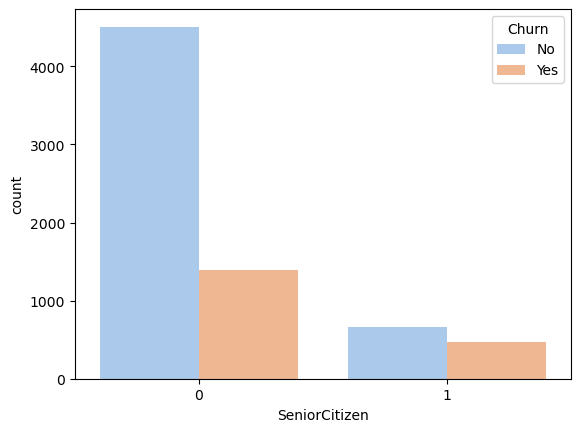

In [42]:
sns.countplot(df['SeniorCitizen'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, majority of the Senior Citizens churn.</b>

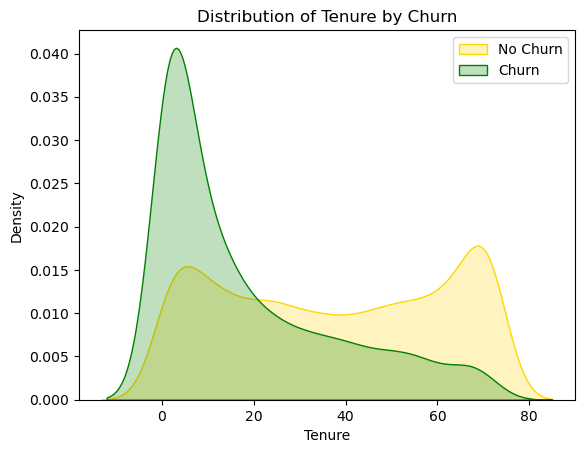

In [43]:
ax = sns.kdeplot(df.tenure[(df['Churn'] == 'No') ],
                color='Gold', shade = True);
ax = sns.kdeplot(df.tenure[(df['Churn'] == 'Yes') ],
                ax =ax, color='Green', shade= True);

ax.legend(['No Churn','Churn'],loc='upper right');

ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of Tenure by Churn');

<b>As we can see, new customers are more likely to churn.</b>

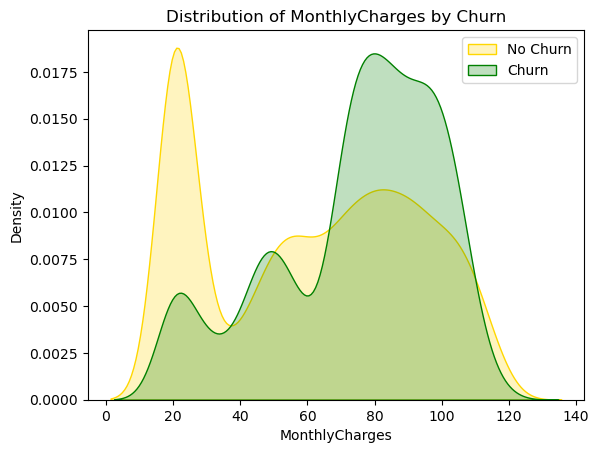

In [44]:
ax = sns.kdeplot(df.MonthlyCharges[(df['Churn'] == 'No') ],
                color='Gold', shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df['Churn'] == 'Yes') ],
                ax =ax, color='Green', shade= True);

ax.legend(['No Churn','Churn'],loc='upper right');

ax.set_ylabel('Density');
ax.set_xlabel('MonthlyCharges');
ax.set_title('Distribution of MonthlyCharges by Churn');

<b>As we can see, customers with high Monthly Charges are more likely to churn.</b>

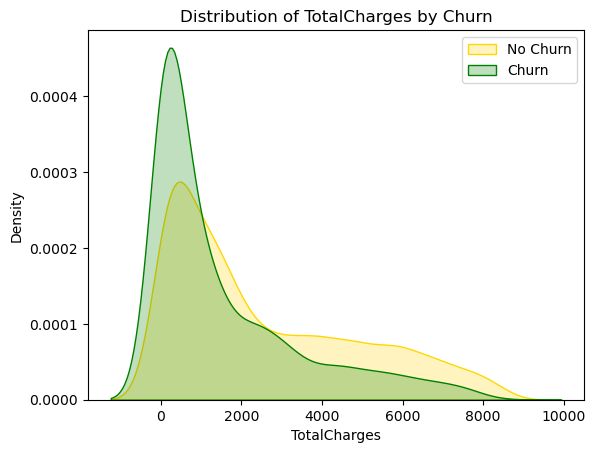

In [45]:
ax = sns.kdeplot(df.TotalCharges[(df['Churn'] == 'No') ],
                color='Gold', shade = True);
ax = sns.kdeplot(df.TotalCharges[(df['Churn'] == 'Yes') ],
                ax =ax, color='Green', shade= True);

ax.legend(['No Churn','Churn'],loc='upper right');

ax.set_ylabel('Density');
ax.set_xlabel('TotalCharges');
ax.set_title('Distribution of TotalCharges by Churn');

<b>As we can see, customers with less Total Charges are more likely to churn.</b>

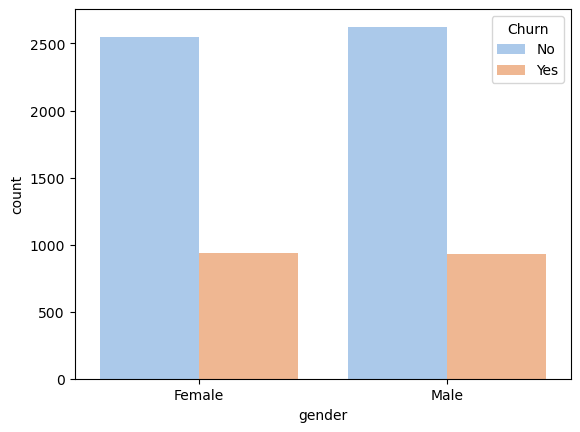

In [46]:
sns.countplot(df['gender'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, both genders behaved in similar way when it comes to migrating to another service provider/firm.</b>

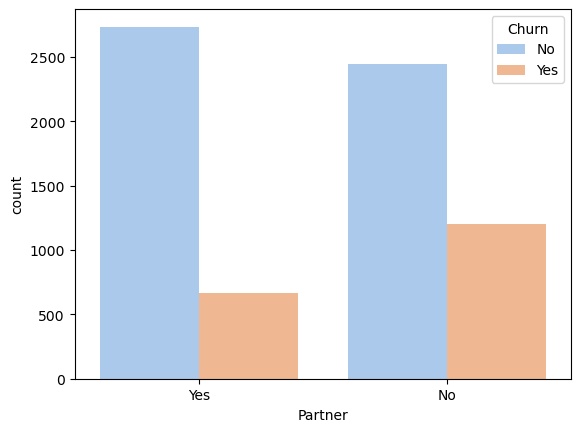

In [47]:
sns.countplot(df['Partner'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, customers who do not have partners are more likely to churn.</b>

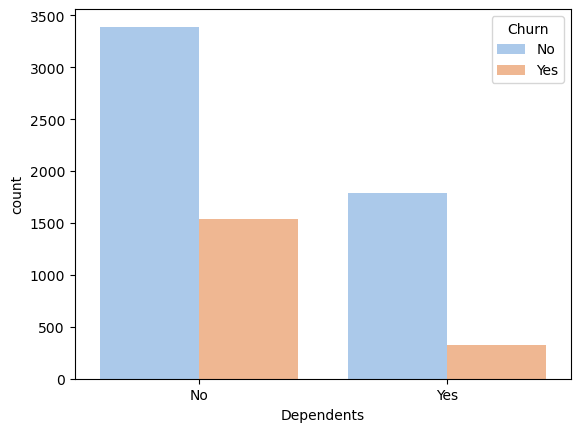

In [48]:
sns.countplot(df['Dependents'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, customers who do not have dependents are more likely to churn.</b>

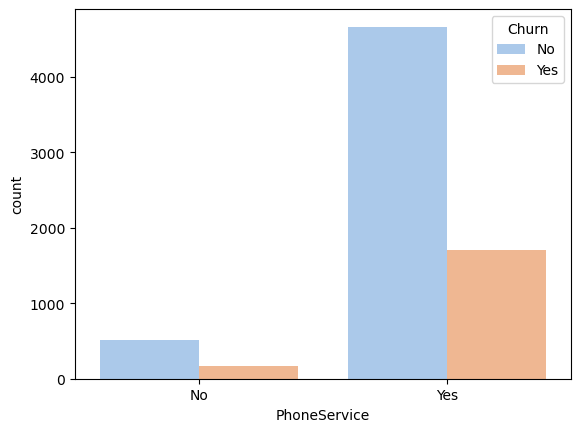

In [49]:
sns.countplot(df['PhoneService'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, customers who use Phone Service are more likely to churn.</b>

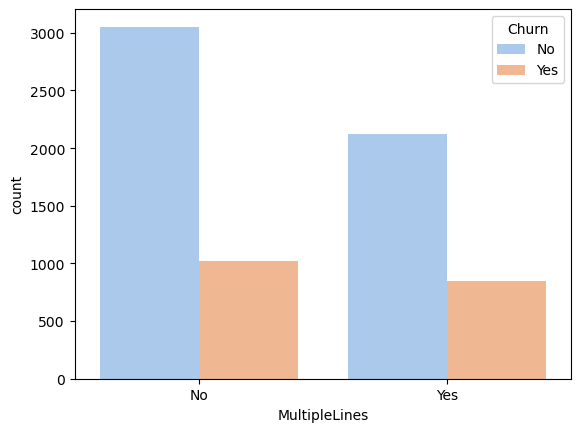

In [50]:
sns.countplot(df['MultipleLines'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, customers who do use Multiple Lines are more likely to churn.</b>

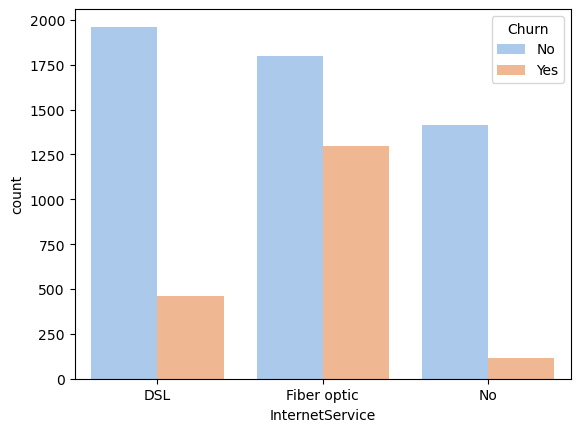

In [51]:
sns.countplot(df['InternetService'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, customers who use Fiber Optic Internet Service are more likely to churn.</b>

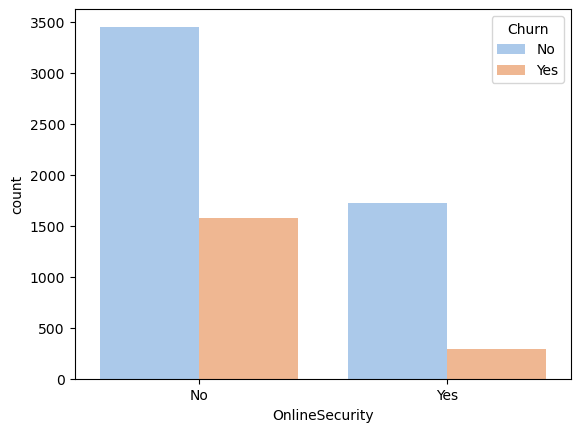

In [52]:
sns.countplot(df['OnlineSecurity'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, customers with no Online Security are more likely to churn.</b>

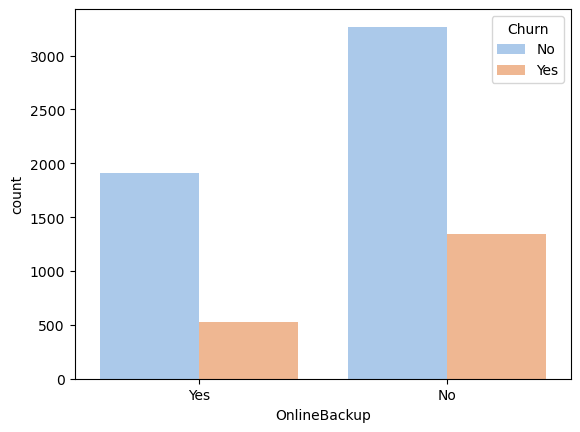

In [53]:
sns.countplot(df['OnlineBackup'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, customers  with no Online Backup are more likely to churn.</b>

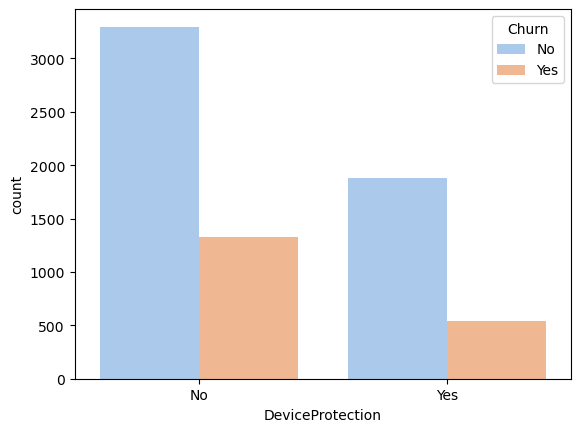

In [54]:
sns.countplot(df['DeviceProtection'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, customers with no Device Protection are more likely to churn.</b>

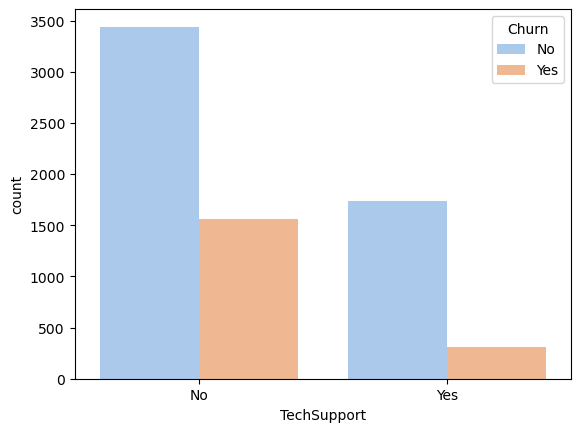

In [55]:
sns.countplot(df['TechSupport'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, customers who do not use Tech Support are more likely to churn.</b>

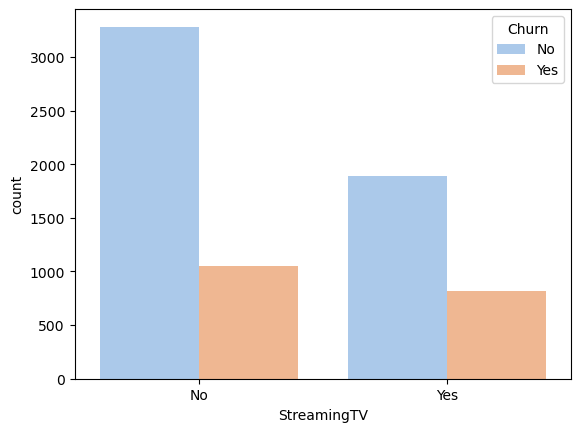

In [56]:
sns.countplot(df['StreamingTV'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, Churn rate is almost equal irrespective of whether the customer has Streaming TV or not.</b>

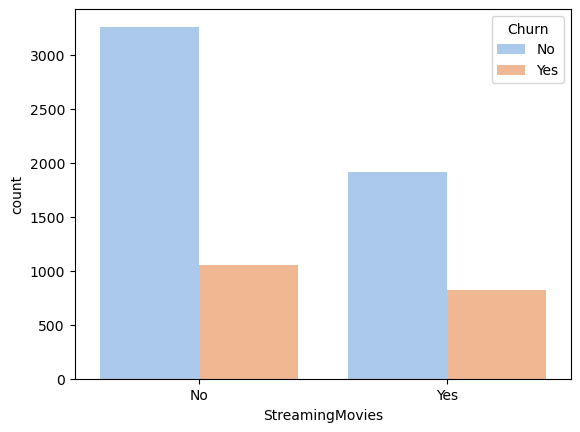

In [57]:
sns.countplot(df['StreamingMovies'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, customers who have Streaming Movies are more likely to churn.</b>

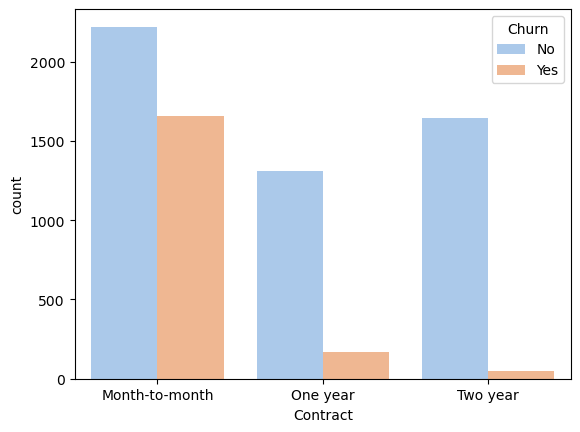

In [58]:
sns.countplot(df['Contract'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, customers who opt for Month-to-month Contract are more likely to churn.</b>

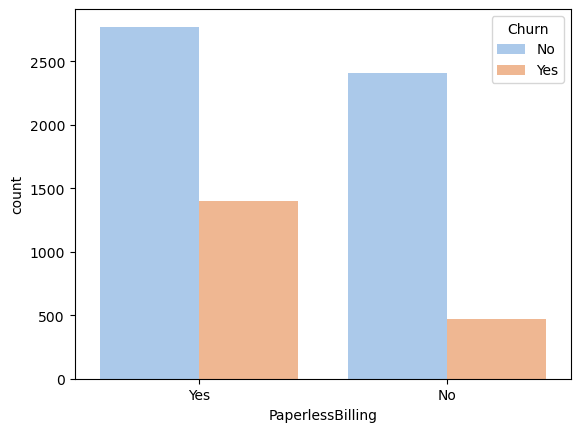

In [59]:
sns.countplot(df['PaperlessBilling'], hue=df['Churn'], palette='pastel')
plt.show()

<b>As we can see, customers who opt for Paperless Billing are more likely to churn.</b>

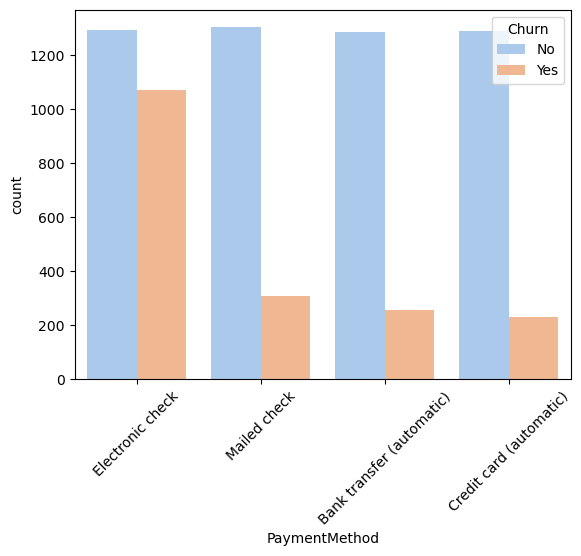

In [60]:
sns.countplot(df['PaymentMethod'], hue=df['Churn'], palette='pastel')
plt.xticks(rotation = 45)
plt.show()

<b>As we can see, customers who prefer Electronic check Payment Method are more likely to churn.</b>

# Multivariate Analysis

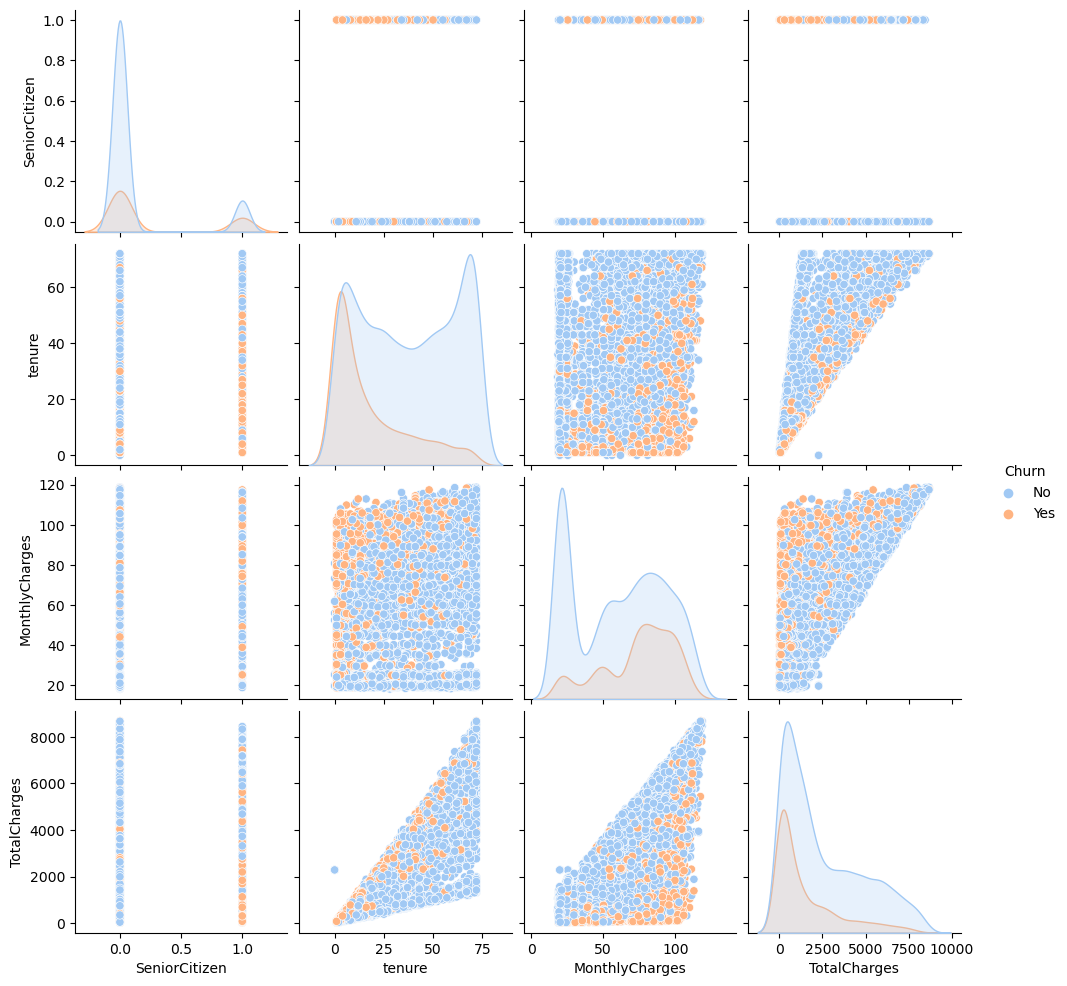

In [61]:
sns.pairplot(df, hue='Churn', palette='pastel')

<b>This pairplot gives the pairwise relationship between the columns which is plotted on the basis of the target variable 'Churn'. We can also observe that the features 'tenure' and 'TotalCharges', 'Monthlycharges' and 'TotalCharges' have strong linear relation with each other.</b>

<b>There are no outliers in any of the columns, but let's plot box plot to identify the outliers.</b>

# Outliers Detection

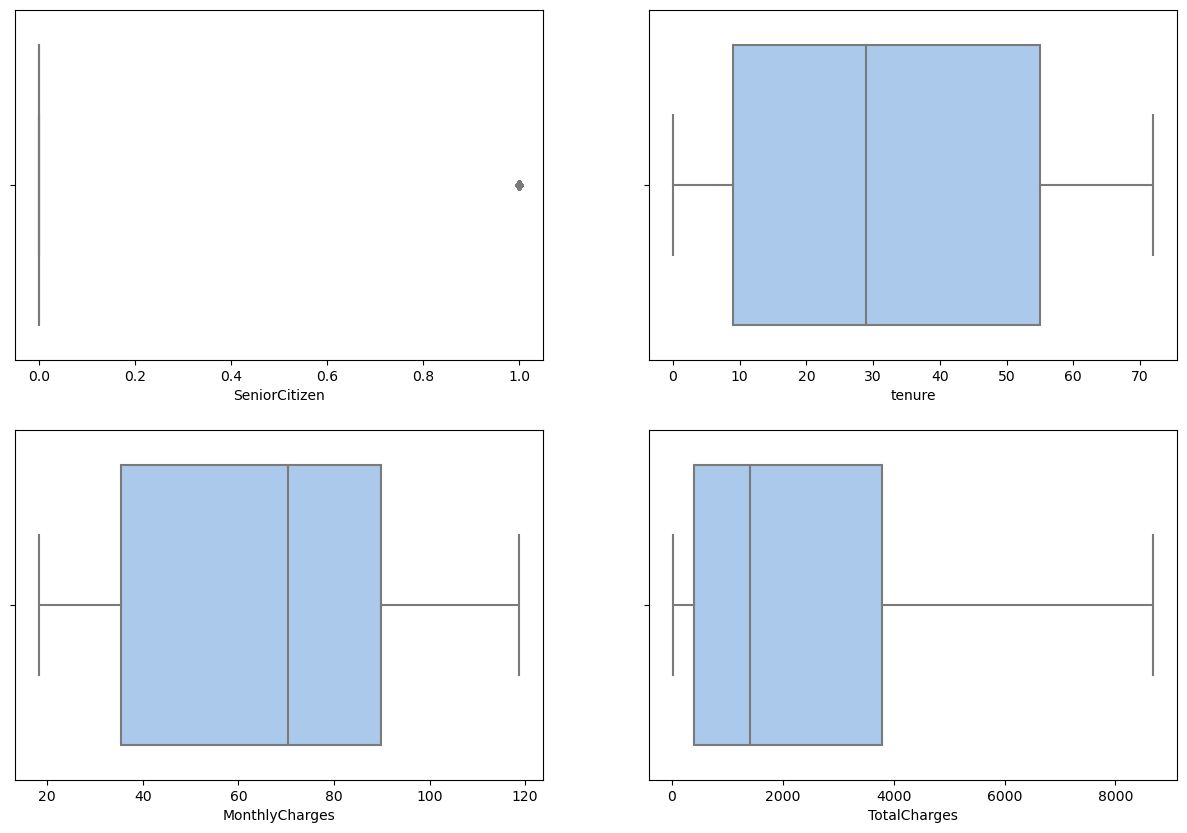

In [62]:
plt.figure(figsize=(15,10))
plotnumber = 1

for column in numerical_columns:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column], palette='pastel')
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.show()

<b>As we can see, outliers are present in the column 'SeniorCitizen', but as it contains categorical data so there is no need to remove outliers.</b>

# Checking for Skewness

In [63]:
df.skew().sort_values()

MonthlyCharges   -0.220524
tenure            0.239540
TotalCharges      0.962394
SeniorCitizen     1.833633
dtype: float64

<b>As we can see, the columns 'TotalCharges' and 'SeniorCitizen' do not lie in the range of +/-0.5. Thus, skewness is present in these columns.</b>

<b>The column 'SeniorCitizen' contains categorical data, so there is no need to remove outliers.</b>

<b>As the column 'TotalCharges' contains continuous data, lets use square root method to remove skewness.</b>.

In [64]:
df['TotalCharges'] = np.sqrt(df['TotalCharges'])

In [65]:
# Now, let's check the skewness again

df.skew().sort_values()

MonthlyCharges   -0.220524
tenure            0.239540
TotalCharges      0.307849
SeniorCitizen     1.833633
dtype: float64

<b>We can see that the skewness has been removed.</b>

# Encoding the categorical columns using Ordinal Encoding

In [66]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,5.463515,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,43.468379,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,10.399519,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,42.903963,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,12.314625,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,44.615020,0.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,85.807342,0.0
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,18.613167,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,17.509997,1.0


# Statistical Description of the Dataset

In [67]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,41.011746,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,24.523918,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,4.335897,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,20.055547,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,37.423923,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,61.535352,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,93.192274,1.000000


# Correlation between features and labels

In [68]:
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.014569,-0.000839,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.220173,0.106805,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,0.096848,0.339866,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.044590,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.113890,0.079060,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,-0.370436,0.247900,0.866617,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.247398,0.095216,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,-0.171026,0.490434,0.474838,0.040102
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,0.011124,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.099721,-0.138625,0.086140,-0.323260,-0.202740,-0.047291
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,-0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,-0.150100,0.296594,0.415834,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,-0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,-0.170898,0.441780,0.503970,-0.082255


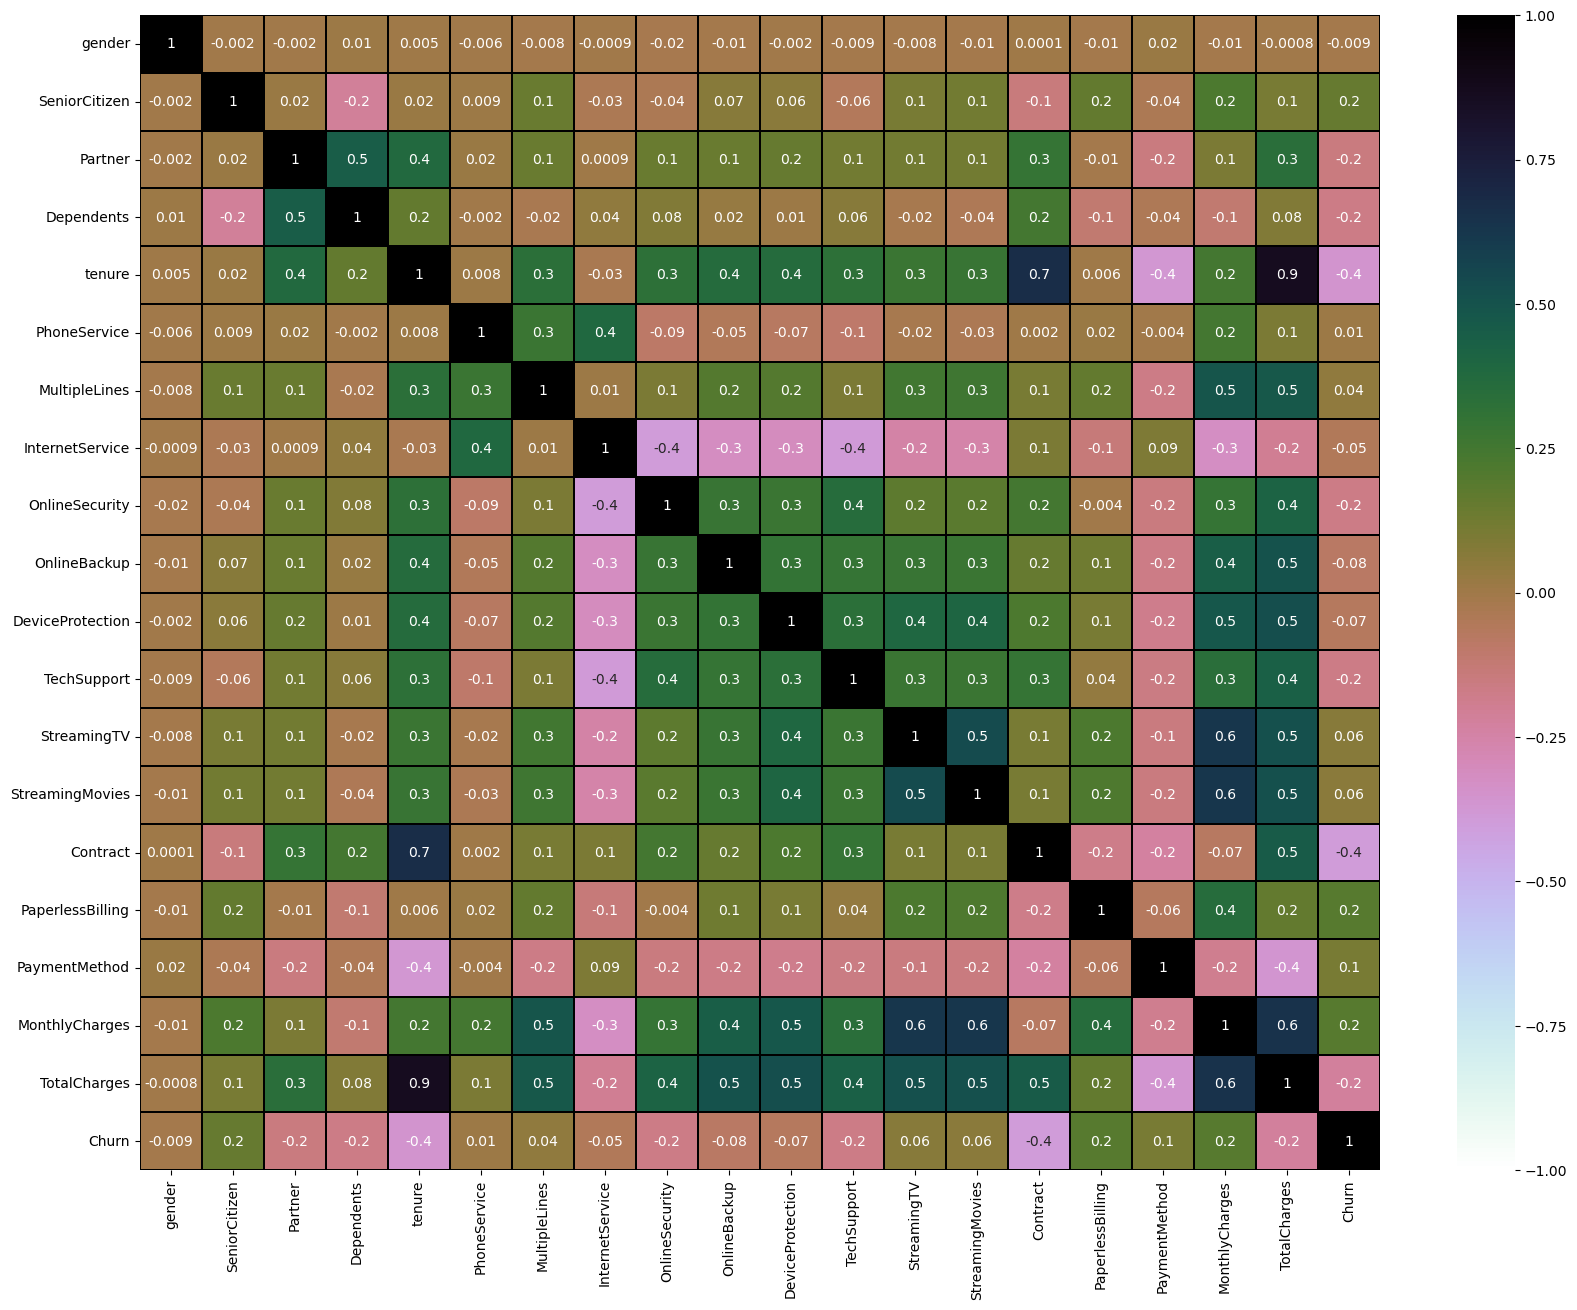

In [69]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap='cubehelix_r')
plt.yticks(rotation=0);

<b>The heatmap contains both positive and negative correlations.</b>

<b>By looking at the heatmap, we can conclude the following things:</b>
* The columns 'MonthlyCharges', 'PaperlessBilling', 'PaymentMethod', 'StreamingMovies', 'StreamingTV', 'MultipleLines', 'PhoneService' and 'SeniorCitizen' are positively correlated.
* The columns 'TotalCharges', 'Contract', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'InternetService', 'tenure', 'Dependents' and 'Partner' are negatively correlated.
* The column 'gender' has very low correlation with the target variable.
* Some columns are highly correlated with each other, which leads to multicolllinearity problem. To overcome multicollinearity problem, we will check VIF values and drop the columns having VIF greater than 10.

In [70]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
StreamingTV         0.063228
StreamingMovies     0.061382
MultipleLines       0.040102
PhoneService        0.011942
gender             -0.008612
InternetService    -0.047291
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
TotalCharges       -0.225372
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

# Visualizing the correlation between target and features using bar plot

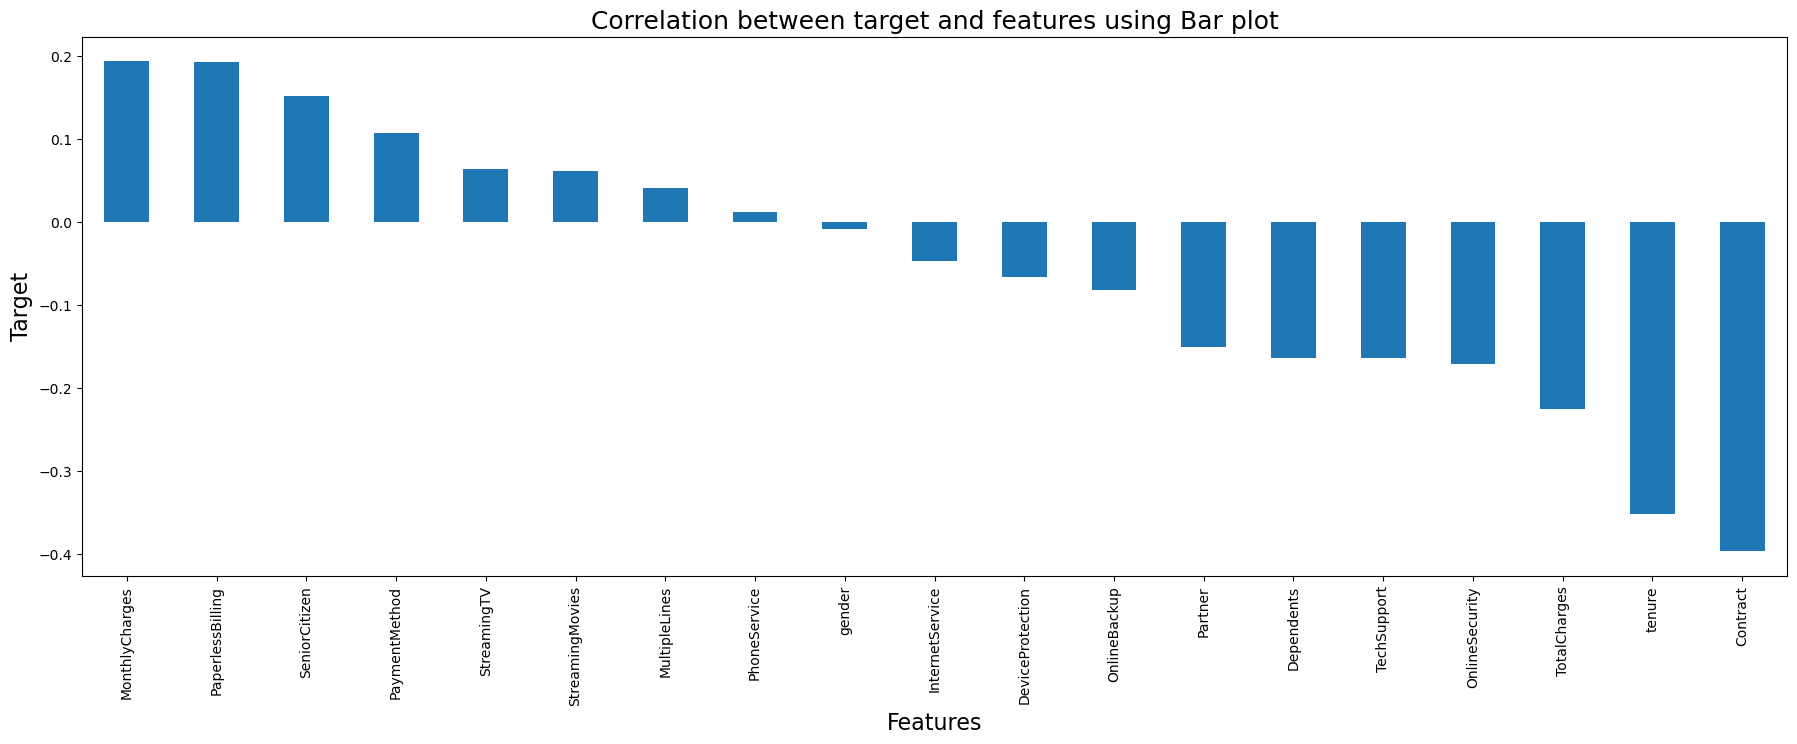

In [71]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Correlation between target and features using Bar plot',fontsize=18)
plt.show()

<b>Let's drop the column 'gender' as it has very low correlation with the target variable.</b>

In [72]:
df.drop('gender',axis = 1, inplace=True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,5.463515,0.0
1,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,43.468379,0.0
2,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,10.399519,1.0
3,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,42.903963,0.0
4,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,12.314625,1.0


In [73]:
df.shape

(7043, 19)

<b>By checking out the shape of the dataset, we can confirm that the column 'gender' has been deleted.</b>

# Seperating dependent and independent variables

In [74]:
x = df.drop('Churn', axis=1)

y = df['Churn']

In [75]:
x.shape

(7043, 18)

In [76]:
y.shape

(7043,)

# Balancing the dataset using SMOTE

In [77]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [78]:
from imblearn.over_sampling import RandomOverSampler  

ROS = RandomOverSampler()

x, y = ROS.fit_resample(x, y)

In [79]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

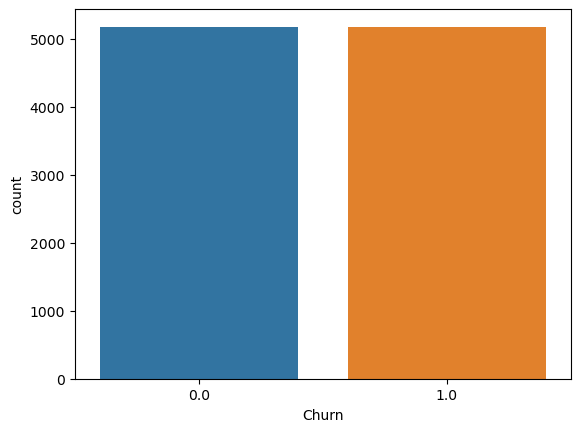

In [80]:
sns.countplot(y)

# Data Standardization using Standard Scaler

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.485368,1.125969,-0.588361,-1.115581,-3.064239,-0.872217,-1.255627,-0.572143,1.438649,-0.699995,-0.579880,-0.820250,-0.824046,-0.670604,0.745871,0.357661,-1.322453,-1.339850
1,-0.485368,-0.888124,-0.588361,0.259636,0.326345,-0.872217,-1.255627,1.747815,-0.695096,1.428582,-0.579880,-0.820250,-0.824046,0.629886,-1.340714,1.340942,-0.380361,0.221846
2,-0.485368,-0.888124,-0.588361,-1.073908,0.326345,-0.872217,-1.255627,1.747815,1.438649,-0.699995,-0.579880,-0.820250,-0.824046,-0.670604,0.745871,1.340942,-0.488128,-1.137019
3,-0.485368,-0.888124,-0.588361,0.718042,-3.064239,-0.872217,-1.255627,1.747815,-0.695096,1.428582,1.724496,-0.820250,-0.824046,0.629886,-1.340714,-1.608903,-0.889647,0.198653
4,-0.485368,-0.888124,-0.588361,-1.073908,0.326345,-0.872217,0.222220,-0.572143,-0.695096,-0.699995,-0.579880,-0.820250,-0.824046,-0.670604,0.745871,0.357661,0.097637,-1.058324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,-0.485368,-0.888124,-0.588361,-1.115581,-3.064239,-0.872217,-1.255627,-0.572143,-0.695096,-0.699995,-0.579880,-0.820250,-0.824046,-0.670604,0.745871,1.340942,-1.510176,-1.361169
10344,-0.485368,1.125969,1.699636,1.009755,0.326345,1.146504,0.222220,-0.572143,-0.695096,1.428582,1.724496,-0.820250,1.213524,1.930376,0.745871,-1.608903,0.985845,1.338453
10345,2.060292,1.125969,-0.588361,0.384656,0.326345,1.146504,0.222220,-0.572143,-0.695096,-0.699995,-0.579880,1.219141,1.213524,-0.670604,0.745871,0.357661,0.855482,0.857424
10346,-0.485368,-0.888124,-0.588361,-0.615502,0.326345,1.146504,0.222220,-0.572143,1.438649,1.428582,-0.579880,-0.820250,-0.824046,-0.670604,0.745871,0.357661,0.575636,-0.227382


<b>The data has been scaled now.</b>

# Checking VIF values to solve multicollinearity

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.149597,SeniorCitizen
1,1.446814,Partner
2,1.374690,Dependents
3,15.474611,tenure
4,1.813448,PhoneService
5,1.548352,MultipleLines
6,1.730784,InternetService
7,1.418784,OnlineSecurity
8,1.424923,OnlineBackup
9,1.475877,DeviceProtection


<b>As the columns 'tenure' and 'TotalCharges' have vif greater than 10. So, let's drop these columns as well.</b>

In [83]:
x.drop(columns=['tenure'], axis=1, inplace=True)
x.drop(columns=['TotalCharges'], axis=1, inplace=True)

In [84]:
x

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,-0.485368,1.125969,-0.588361,-3.064239,-0.872217,-1.255627,-0.572143,1.438649,-0.699995,-0.579880,-0.820250,-0.824046,-0.670604,0.745871,0.357661,-1.322453
1,-0.485368,-0.888124,-0.588361,0.326345,-0.872217,-1.255627,1.747815,-0.695096,1.428582,-0.579880,-0.820250,-0.824046,0.629886,-1.340714,1.340942,-0.380361
2,-0.485368,-0.888124,-0.588361,0.326345,-0.872217,-1.255627,1.747815,1.438649,-0.699995,-0.579880,-0.820250,-0.824046,-0.670604,0.745871,1.340942,-0.488128
3,-0.485368,-0.888124,-0.588361,-3.064239,-0.872217,-1.255627,1.747815,-0.695096,1.428582,1.724496,-0.820250,-0.824046,0.629886,-1.340714,-1.608903,-0.889647
4,-0.485368,-0.888124,-0.588361,0.326345,-0.872217,0.222220,-0.572143,-0.695096,-0.699995,-0.579880,-0.820250,-0.824046,-0.670604,0.745871,0.357661,0.097637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,-0.485368,-0.888124,-0.588361,-3.064239,-0.872217,-1.255627,-0.572143,-0.695096,-0.699995,-0.579880,-0.820250,-0.824046,-0.670604,0.745871,1.340942,-1.510176
10344,-0.485368,1.125969,1.699636,0.326345,1.146504,0.222220,-0.572143,-0.695096,1.428582,1.724496,-0.820250,1.213524,1.930376,0.745871,-1.608903,0.985845
10345,2.060292,1.125969,-0.588361,0.326345,1.146504,0.222220,-0.572143,-0.695096,-0.699995,-0.579880,1.219141,1.213524,-0.670604,0.745871,0.357661,0.855482
10346,-0.485368,-0.888124,-0.588361,0.326345,1.146504,0.222220,-0.572143,1.438649,1.428582,-0.579880,-0.820250,-0.824046,-0.670604,0.745871,0.357661,0.575636


In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.145506,SeniorCitizen
1,1.387739,Partner
2,1.372127,Dependents
3,1.807882,PhoneService
4,1.466300,MultipleLines
5,1.709755,InternetService
6,1.366675,OnlineSecurity
7,1.330853,OnlineBackup
8,1.440757,DeviceProtection
9,1.444848,TechSupport


<b>As we can see, the vif value of all the columns is less than 10. Hence, we can conclude that the multicollinearity problem has been solved.</b>

# Finding best random state

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [87]:
from sklearn.linear_model import LogisticRegression

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.08276201998476507 on Random_state  100


# Train Test Split

In [89]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.3, random_state=100)

# Logistic Regression

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [91]:
lr = LogisticRegression()

lr.fit(xtrain, ytrain)

predlr = lr.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest, predlr)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest, predlr)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest, predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest, predlr)}")

Accuracy Score: 77.06924315619968%
roc_auc_score: 77.08585383340053%
---------------------------------------------------
Confusion Matrix : 
 [[1111  446]
 [ 266 1282]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.81      0.71      0.76      1557
         1.0       0.74      0.83      0.78      1548

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



# Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
pred_dtc = dtc.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest, pred_dtc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest, pred_dtc)*100}%")
print("---------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(ytest, pred_dtc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest, pred_dtc)}")

Accuracy Score: 83.51046698872786%
roc_auc_score: 83.52787859778047%
---------------------------------------------------
Confusion Matrix : 
 [[1207  350]
 [ 162 1386]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      1557
         1.0       0.80      0.90      0.84      1548

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.83      3105
weighted avg       0.84      0.84      0.83      3105



# Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
pred_rfc = rfc.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest, pred_rfc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest, pred_rfc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest, pred_rfc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest, pred_rfc)}")

Accuracy Score: 86.34460547504025%
roc_auc_score: 86.35886693253273%
---------------------------------------------------
Confusion Matrix : 
 [[1268  289]
 [ 135 1413]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.90      0.81      0.86      1557
         1.0       0.83      0.91      0.87      1548

    accuracy                           0.86      3105
   macro avg       0.87      0.86      0.86      3105
weighted avg       0.87      0.86      0.86      3105



# KNeighbors Classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(xtrain,ytrain)
pred_knc = knc.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest,pred_knc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest,pred_knc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest,pred_knc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest,pred_knc)}")

Accuracy Score: 76.68276972624798%
roc_auc_score: 76.70740541590118%
---------------------------------------------------
Confusion Matrix : 
 [[1062  495]
 [ 229 1319]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.82      0.68      0.75      1557
         1.0       0.73      0.85      0.78      1548

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.78      0.77      0.77      3105



# Support Vector Machine Classifier

In [95]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xtrain,ytrain)
pred_svc = svc.predict(xtest)
print(f"Accuracy Score: {accuracy_score(ytest, pred_svc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest, pred_svc)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest, pred_svc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest, pred_svc)}")

Accuracy Score: 77.487922705314%
roc_auc_score: 77.50519036310136%
---------------------------------------------------
Confusion Matrix : 
 [[1114  443]
 [ 256 1292]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.81      0.72      0.76      1557
         1.0       0.74      0.83      0.79      1548

    accuracy                           0.77      3105
   macro avg       0.78      0.78      0.77      3105
weighted avg       0.78      0.77      0.77      3105



# AdaBoost Classifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

abc = AdaBoostClassifier()
abc.fit(xtrain, ytrain)
pred_abc = abc.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest, pred_abc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest, pred_abc)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest, pred_abc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest, pred_abc)}")

Accuracy Score: 77.10144927536233%
roc_auc_score: 77.11740676016788%
--------------------------------------------------------
Confusion Matrix : 
 [[1115  442]
 [ 269 1279]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.81      0.72      0.76      1557
         1.0       0.74      0.83      0.78      1548

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



# XGB Classifier

In [97]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)
pred_xgb = xgb.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest, pred_xgb)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest, pred_xgb)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest, pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest, pred_xgb)}")

Accuracy Score: 82.99516908212561%
roc_auc_score: 83.01463010261236%
--------------------------------------------------------
Confusion Matrix : 
 [[1188  369]
 [ 159 1389]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.88      0.76      0.82      1557
         1.0       0.79      0.90      0.84      1548

    accuracy                           0.83      3105
   macro avg       0.84      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105



# Naive Bayes Classifier

In [98]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
pred_gnb = gnb.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest, pred_gnb)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest, pred_gnb)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest, pred_gnb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest, pred_gnb)}")

Accuracy Score: 75.9098228663446%
roc_auc_score: 75.92063598751326%
--------------------------------------------------------
Confusion Matrix : 
 [[1124  433]
 [ 315 1233]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      1557
         1.0       0.74      0.80      0.77      1548

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



# Extra Trees Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier


xtc = ExtraTreesClassifier()
xtc.fit(xtrain, ytrain)
pred_xtc = xtc.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest, pred_xtc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest, pred_xtc)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest, pred_xtc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest, pred_xtc)}")

Accuracy Score: 86.60225442834138%
roc_auc_score: 86.61315738375828%
--------------------------------------------------------
Confusion Matrix : 
 [[1290  267]
 [ 149 1399]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.90      0.83      0.86      1557
         1.0       0.84      0.90      0.87      1548

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



# Gradient Boosting Classifier

In [100]:
gbc = GradientBoostingClassifier()
gbc.fit(xtrain, ytrain)
pred_gbc = gbc.predict(xtest)

print(f"Accuracy Score: {accuracy_score(ytest, pred_gbc)*100}%")
print(f"roc_auc_score: {roc_auc_score(ytest, pred_gbc)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest, pred_gbc)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(ytest, pred_gbc)}")

Accuracy Score: 77.64895330112721%
roc_auc_score: 77.66724918223775%
--------------------------------------------------------
Confusion Matrix : 
 [[1111  446]
 [ 248 1300]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.82      0.71      0.76      1557
         1.0       0.74      0.84      0.79      1548

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



# Cross-Validation

In [102]:
from sklearn.model_selection import cross_val_score


print("Cross validation score of LogisticRegression() is:", cross_val_score(lr,x,y,cv=5).mean())
print("Cross validation score of DecisionTreeClassifier() is:", cross_val_score(dtc,x,y,cv=5).mean())
print("Cross validation score of RandomForestClassifier() is:", cross_val_score(rfc,x,y,cv=5).mean())
print("Cross validation score of KNeighborsClassifier() is:", cross_val_score(knc,x,y,cv=5).mean())
print("Cross validation score of SVC() is:", cross_val_score(svc,x,y,cv=5).mean())
print("Cross validation score of AdaBoostClassifier() is:", cross_val_score(abc,x,y,cv=5).mean())
print("Cross validation score of XGBClassifier() is:", cross_val_score(xgb,x,y,cv=5).mean())
print("Cross validation score of NaiveBayesClassifier() is:", cross_val_score(gnb,x,y,cv=5).mean())
print("Cross validation score of ExtraTreesClassifier() is:", cross_val_score(xtc,x,y,cv=5).mean())
print("Cross validation score of GradientBoostingClassifier() is:", cross_val_score(gbc,x,y,cv=5).mean())

Cross validation score of LogisticRegression() is: 0.7531884758442432
Cross validation score of DecisionTreeClassifier() is: 0.8646144255083671
Cross validation score of RandomForestClassifier() is: 0.8844250180371389
Cross validation score of KNeighborsClassifier() is: 0.7576354419857898
Cross validation score of SVC() is: 0.7648827994573681
Cross validation score of AdaBoostClassifier() is: 0.7541550330038783
Cross validation score of XGBClassifier() is: 0.8220933354814457
Cross validation score of NaiveBayesClassifier() is: 0.7410128816693635
Cross validation score of ExtraTreesClassifier() is: 0.8875169922691304
Cross validation score of GradientBoostingClassifier() is: 0.7608236142924187


<b>From above observations, we can conclude that Extra Trees Classifier is giving least difference between accuracy and cross validation score. Hence, it is the best model.</b>

# Plotting ROC-AUC Curves

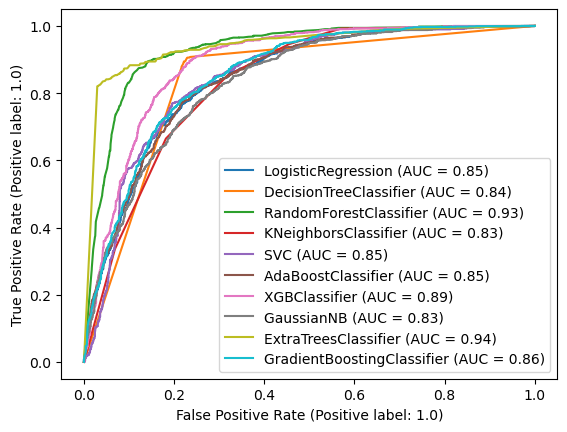

In [103]:
#Lets plot roc curve and check auc and performance of all algorithms

from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(lr, xtest, ytest)
plot_roc_curve(dtc, xtest, ytest, ax = disp.ax_)
plot_roc_curve(rfc, xtest, ytest, ax = disp.ax_)
plot_roc_curve(knc, xtest, ytest, ax = disp.ax_)
plot_roc_curve(svc, xtest, ytest, ax = disp.ax_)
plot_roc_curve(abc, xtest, ytest, ax = disp.ax_)
plot_roc_curve(xgb, xtest, ytest, ax = disp.ax_)
plot_roc_curve(gnb, xtest, ytest, ax = disp.ax_)
plot_roc_curve(xtc, xtest, ytest, ax = disp.ax_)
plot_roc_curve(gbc, xtest, ytest, ax = disp.ax_)

plt.legend(prop={"size" :10} ,loc = 'lower right')

plt.show()

# Hyperparameter Tuning

In [104]:
from sklearn.model_selection import GridSearchCV 

In [105]:
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]
             }

In [106]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [108]:
GCV.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [109]:
GCV.best_params_ 

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

In [110]:
model = ExtraTreesClassifier(criterion = 'entropy', max_depth=20, min_samples_leaf = 1, n_estimators=1000)

In [111]:
model.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [112]:
print(f"Accuracy Score: {accuracy_score(ytest, pred)*100}%")
print("---------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(ytest, pred)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(ytest, pred)}\n")
print("---------------------------------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(ytest, pred)}")
print("---------------------------------------------------")

Accuracy Score: 87.05314009661835%
---------------------------------------------------
roc_auc_score: 87.06572717360459%
---------------------------------------------------
Confusion Matrix : 
 [[1288  269]
 [ 133 1415]]

---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      1557
         1.0       0.84      0.91      0.88      1548

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105

---------------------------------------------------


<b>After Hyperparameter Tuning, we got an accuracy score of 87.05%.</b>

# ROC curve for final model

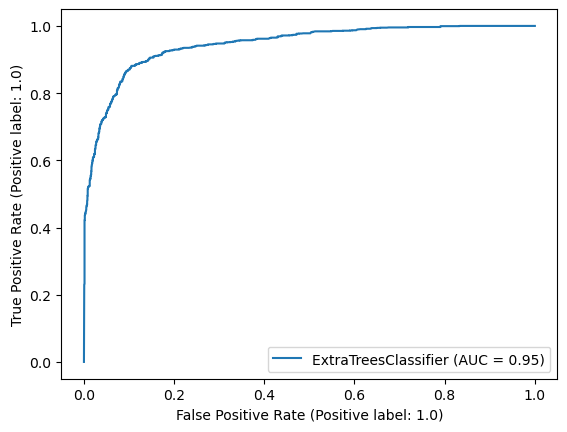

In [113]:
#Lets check our model performance after hyperparameter tuning

plot_roc_curve(model, xtest, ytest)
plt.show()

<b>Note that, we have improved the model's accuracy score as well as performance (AUC) by adjusting the hyperparameters.</b>

# Saving the model

In [114]:
import joblib

joblib.dump(model, 'Customer Churn Analysis.pkl')

['Customer Churn Analysis.pkl']

# Loading the model

In [115]:
loadmodel = joblib.load('Customer Churn Analysis.pkl')

In [116]:
import numpy as np

a = np.array(ytest)
predicted = np.array(loadmodel.predict(xtest))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
3100,0.0,0.0
3101,0.0,0.0
3102,1.0,1.0
3103,1.0,1.0


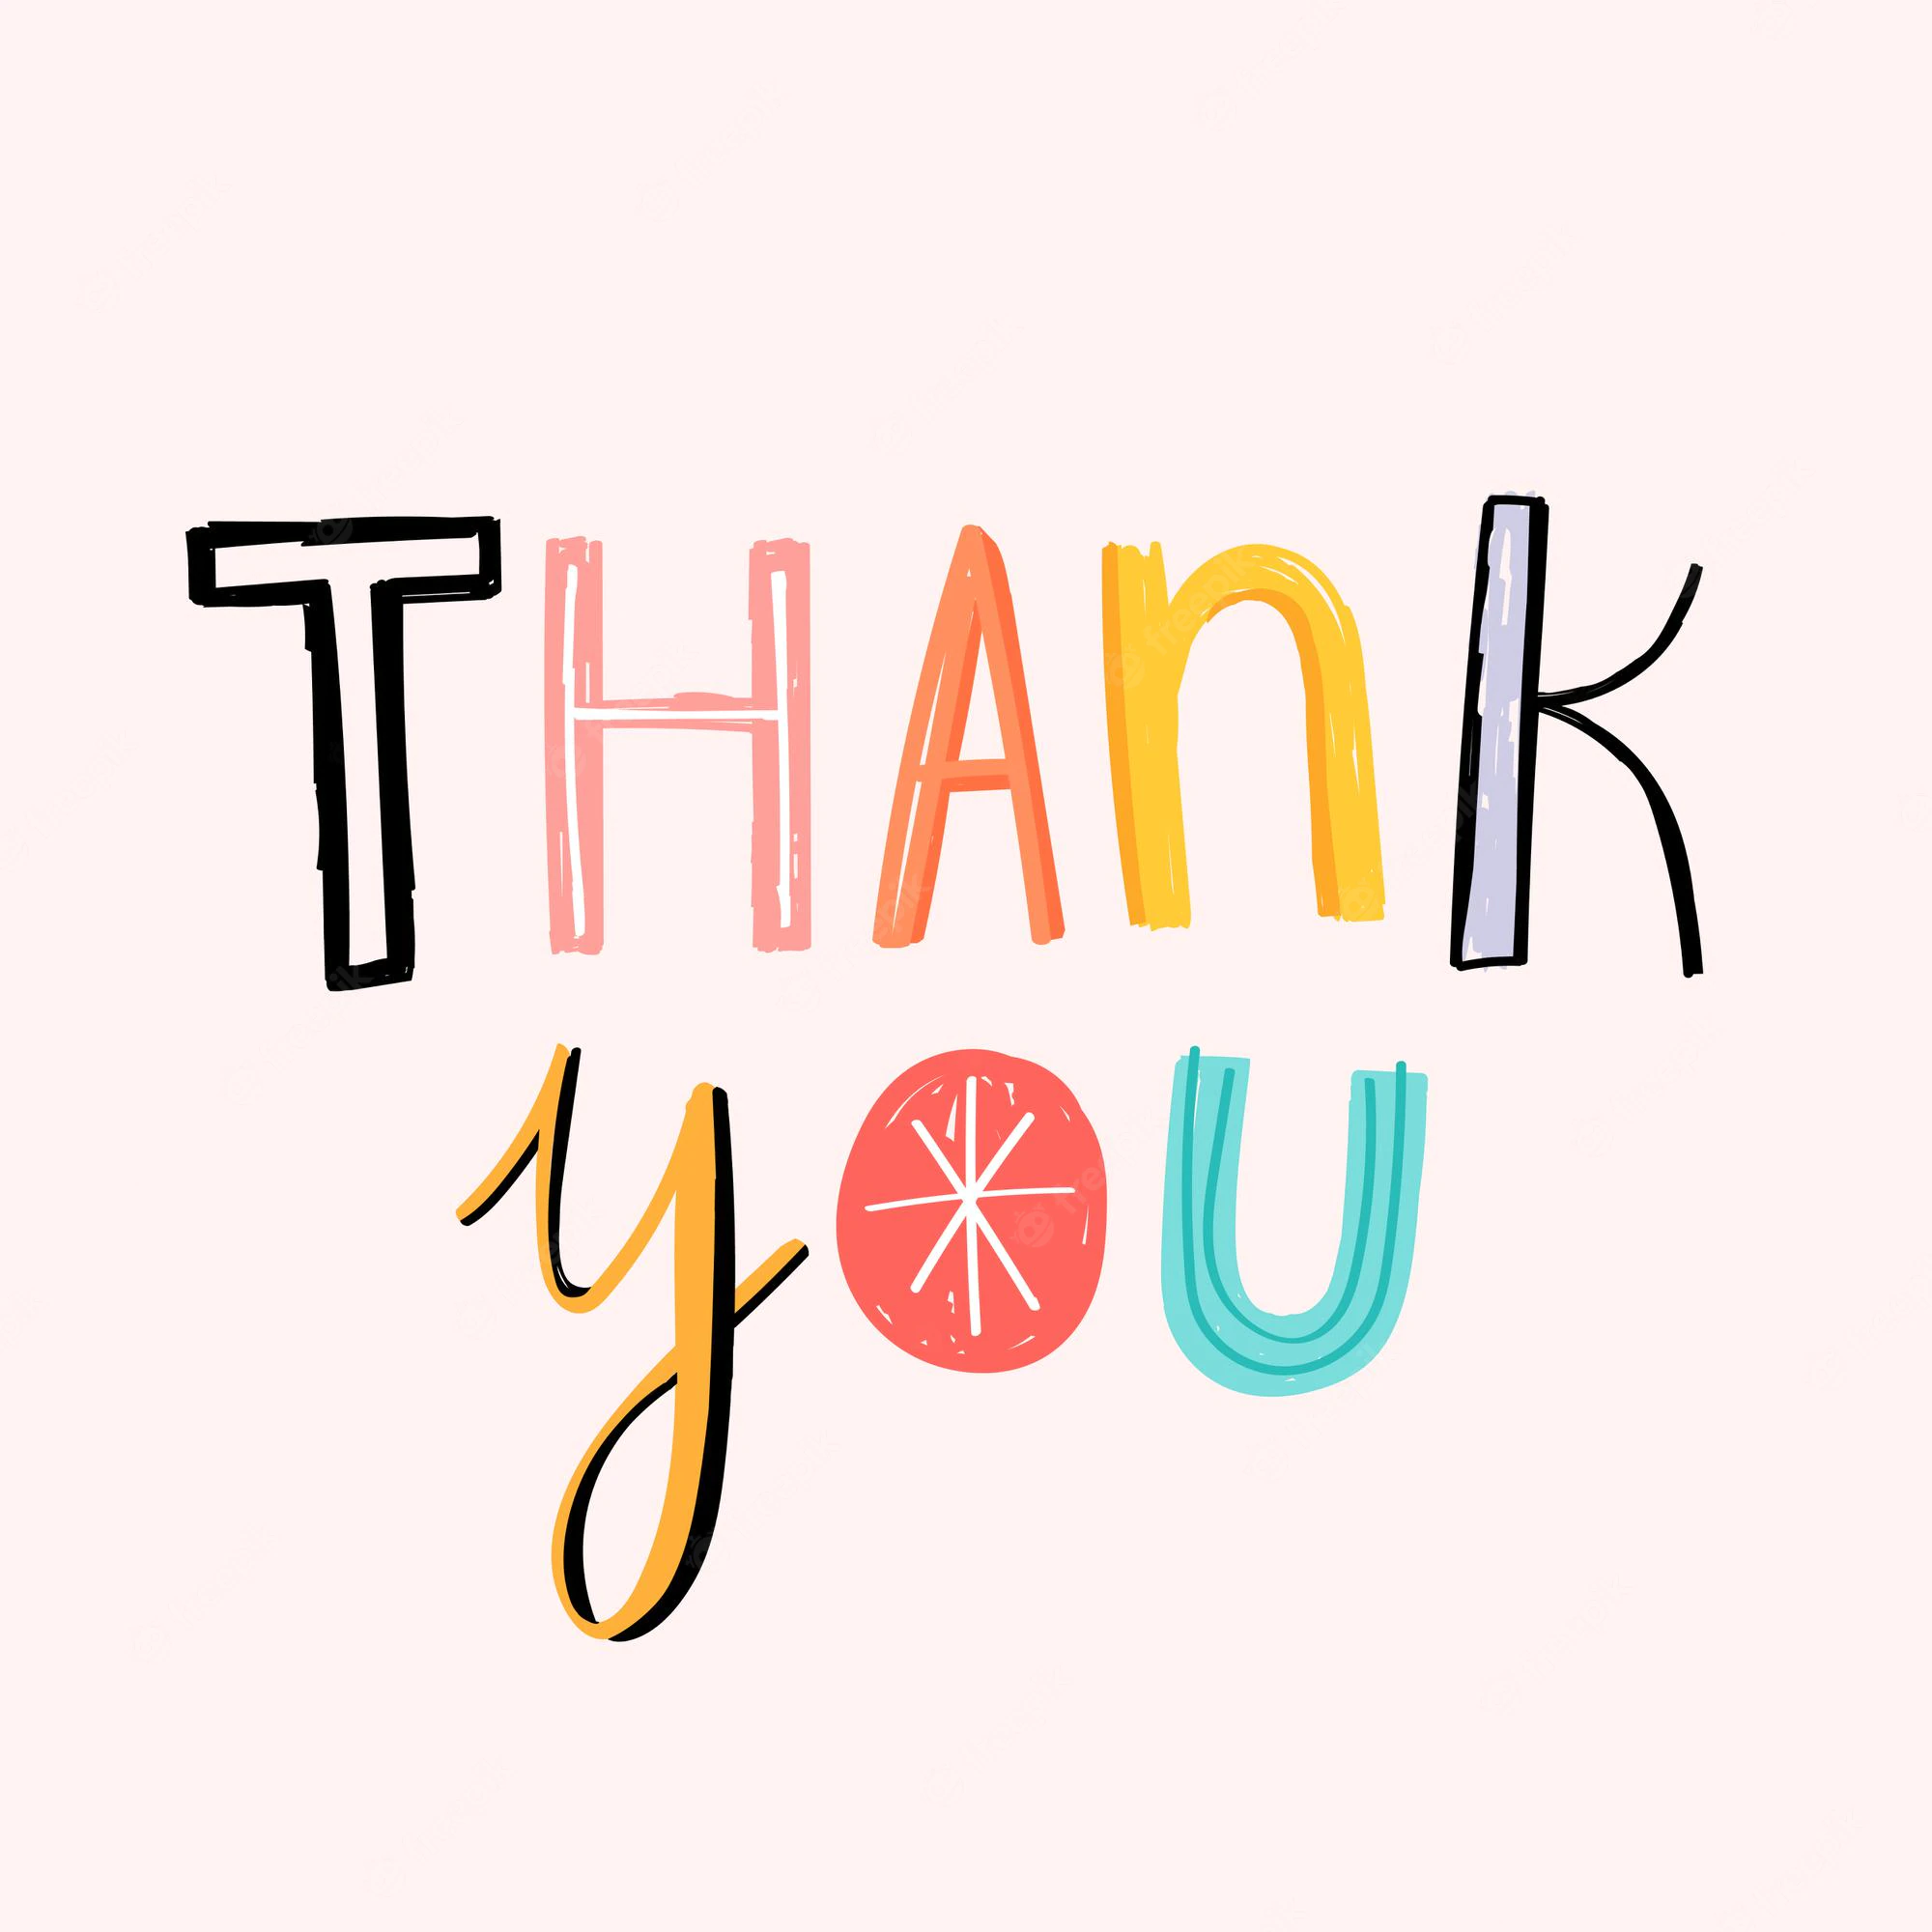